In [1]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

## Definicje funkcji

In [2]:
def extract_data_by_hours(data, device_num, start_hour, end_hour, parameter):
    column_name = f'{device_num}_{parameter}'
    columns_to_select = ['timestamp', column_name]
    data_for_device = data[columns_to_select]
    data_for_device = data_for_device[data_for_device['timestamp'].dt.hour >= start_hour]
    data_for_device = data_for_device[data_for_device['timestamp'].dt.hour < end_hour]
    return data_for_device

In [3]:
def extract_data(data, device_num, start_date, end_date, parameter):
    column_name = f'{device_num}_{parameter}'
    columns_to_select = ['UTC time', column_name]
    data_for_device = data[columns_to_select]
    data_for_device = data_for_device[data_for_device['UTC time'] >= start_date]
    data_for_device = data_for_device[data_for_device['UTC time'] <= end_date]
    return data_for_device


In [4]:
def get_data_for_location_number(device_num):
    columns_to_select = ['UTC time'] + [ col for col in airly_data.columns if col.startswith(str(device_num))] 
    return airly_data[columns_to_select]

## Wczytanie danych

In [5]:
locations = pd.read_csv("data/location_const.csv")
locations = locations[['id', 'latitude', 'longitude', 'city', 'street', 'number','elevation']]
locations = locations.set_index('id', drop = False)
airly_data = pd.read_csv("data/data.csv")

start_date = "2018-10-23T00:00:00"
end_date = "2019-01-05T23:00:00"
parameter = 'pm25'
for loc in locations['id']:
    try:
        data = extract_data(airly_data, loc, start_date, end_date, parameter)
        change = data[f'{loc}_{parameter}']
        locations.loc[loc, 'values'] = ','.join(list(map(lambda x: str(x), change)))
    except KeyError:
        locations = locations.drop(index=loc)
        continue
locations.head()

,id,latitude,longitude,city,street,number,elevation,values
id,,,,,,,,
820,820,50.052433,19.949579,Kraków,Starowiślna,79a,207.02,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
1081,1081,50.055163,19.947015,Kraków,Starowiślna,38,207.89,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
622,622,50.044424,19.952205,Kraków,Krakusa,11,205.57,"12.63,12.7,15.86,18.88,23.66,29.35,24.09,17.02..."
842,842,50.042480,19.944330,Kraków,Kalwaryjska,30,204.47,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na..."
2277,2277,50.056538,19.954229,Kraków,Prochowa,1,203.75,"11.41,10.51,14.97,18.23,21.48,25.77,23.09,15.2..."


In [6]:
airly_data.head()

,UTC time,1015_humidity,1015_pm1,1015_pm10,1015_pm25,1015_pressure,1015_temperature,1026_humidity,1026_pm1,1026_pm10,...,935_pm10,935_pm25,935_pressure,935_temperature,988_humidity,988_pm1,988_pm10,988_pm25,988_pressure,988_temperature
0,2018-10-23T01:00:00,93.67,8.90,22.64,12.45,1024.64,6.92,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-23T02:00:00,92.72,8.17,20.97,11.36,1024.52,5.87,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-23T03:00:00,88.18,11.13,30.95,16.26,1024.02,5.50,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-23T04:00:00,89.74,12.43,36.23,18.75,1023.41,4.59,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-23T05:00:00,94.18,15.53,48.21,24.28,1022.52,4.27,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Najgorsza średnia jakość powietrza w danym okresie czasu

In [7]:
start_date = "2018-10-23T00:00:00"
end_date = "2019-01-05T23:00:00"
pm10_columns = ["UTC time"] + [col for col in airly_data.columns if col.endswith("pm10")]
pm10 = airly_data[pm10_columns]
pm10 = pm10[pm10["UTC time"] >= start_date]
pm10 = pm10[pm10["UTC time"] <= end_date]
pm10['mean'] = pm10.mean(axis=1)
mean_values = pd.DataFrame(pm10.mean(axis=0))
mean_values.columns = ["mean_pm10"]
mean_values[mean_values["mean_pm10"] == mean_values["mean_pm10"].max()]

,mean_pm10
2975_pm10,121.856694


## Analiza danych dla wybranej lokalizacji

In [8]:
loc = get_data_for_location_number('622')
tmp = pd.to_datetime(loc["UTC time"])
loc = loc.assign(dates= tmp.values)
loc.head()

,UTC time,622_humidity,622_pm1,622_pm10,622_pm25,622_pressure,622_temperature,dates
0,2018-10-23T01:00:00,93.73,9.43,21.48,12.63,1026.36,7.09,2018-10-23 01:00:00
1,2018-10-23T02:00:00,92.70,9.72,21.64,12.70,1026.28,6.15,2018-10-23 02:00:00
2,2018-10-23T03:00:00,88.29,11.74,27.75,15.86,1025.90,5.82,2018-10-23 03:00:00
3,2018-10-23T04:00:00,89.43,13.30,33.11,18.88,1025.22,4.70,2018-10-23 04:00:00
4,2018-10-23T05:00:00,94.03,16.03,43.56,23.66,1024.28,4.36,2018-10-23 05:00:00


In [9]:
loc.describe()

,622_humidity,622_pm1,622_pm10,622_pm25,622_pressure,622_temperature
count,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000,1803.000000
mean,88.515618,26.292402,68.340177,39.958763,1021.334725,2.851409
std,7.823255,18.379820,43.238797,28.444446,7.690069,5.366671
min,45.050000,0.950000,2.210000,1.230000,998.330000,-9.170000
25%,85.000000,14.785000,37.140000,20.815000,1016.625000,-0.925000
50%,90.250000,21.440000,62.410000,33.640000,1022.460000,2.210000
75%,94.000000,30.675000,85.380000,48.060000,1026.260000,6.200000
max,100.000000,104.670000,271.320000,170.010000,1039.920000,20.720000


## Wyświetl histogramy dla parametrów w danej lokalizacji

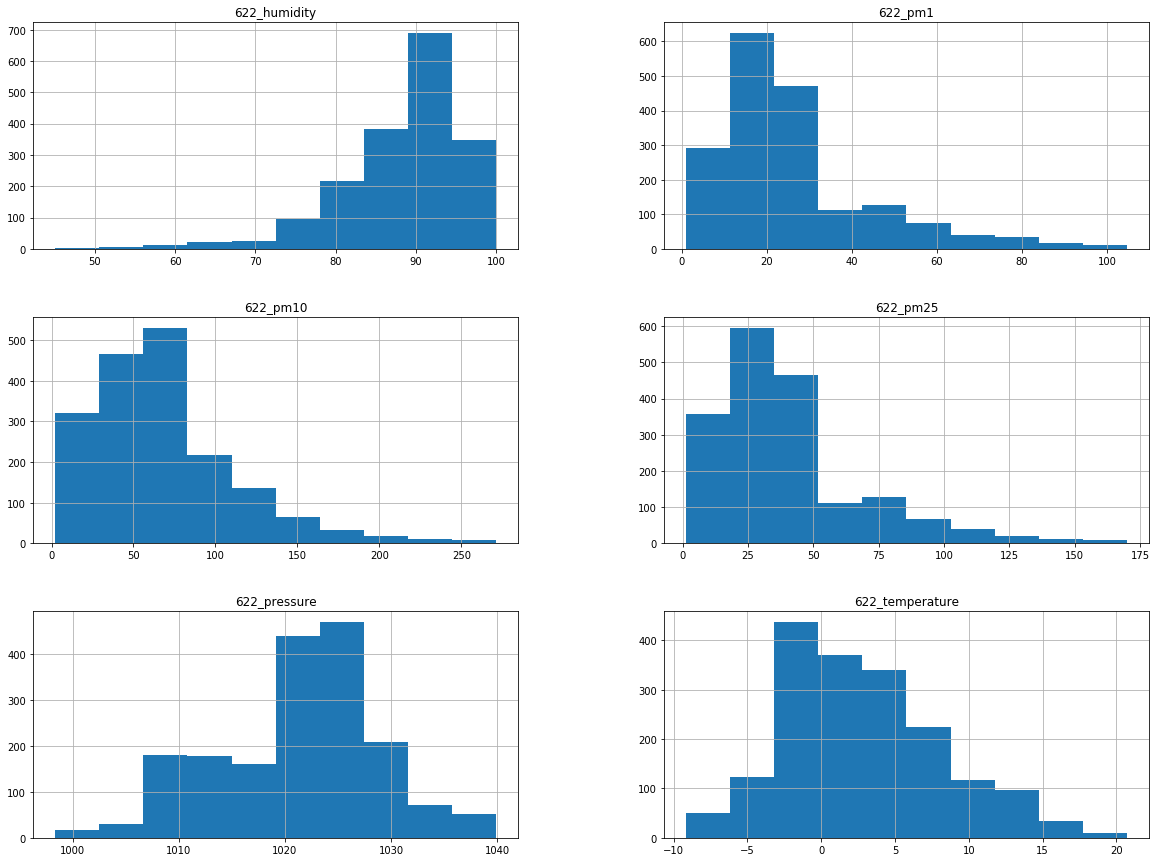

In [10]:
loc.hist(figsize=(20,15))
plt.show()

## Wyświetl wykres zmian pm 10 w czasie dla danej lokalizacji

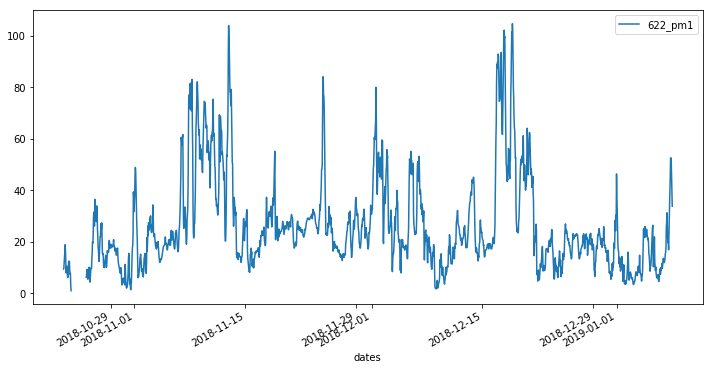

In [15]:
loc.plot(kind="line",x="dates", y="622_pm1", figsize=(12,6))

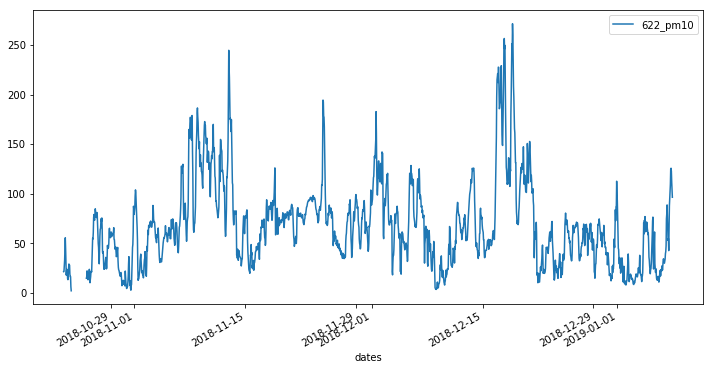

In [16]:
loc.plot(kind="line",x="dates", y="622_pm10", figsize=(12,6))

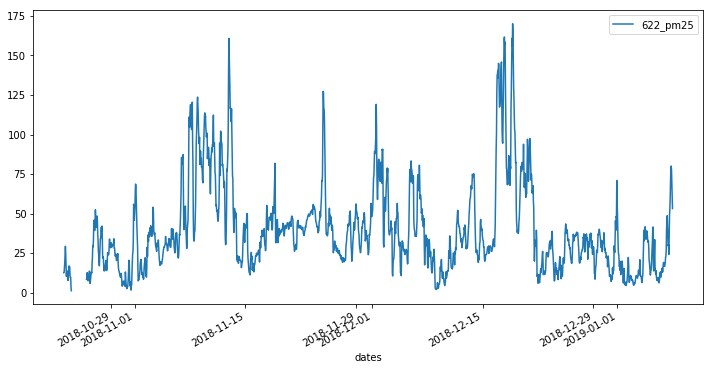

In [17]:
loc.plot(kind="line",x="dates", y="622_pm25", figsize=(12,6))

## Korelacje między parametrami dla danej lokalizacji

In [12]:
corr_matrix = loc.corr()
corr_matrix

,622_humidity,622_pm1,622_pm10,622_pm25,622_pressure,622_temperature
622_humidity,1.000000,0.210374,0.245074,0.225975,-0.082947,-0.211523
622_pm1,0.210374,1.000000,0.984222,0.997044,0.183439,-0.193582
622_pm10,0.245074,0.984222,1.000000,0.993527,0.225473,-0.238567
622_pm25,0.225975,0.997044,0.993527,1.000000,0.199073,-0.215593
622_pressure,-0.082947,0.183439,0.225473,0.199073,1.000000,-0.319662
622_temperature,-0.211523,-0.193582,-0.238567,-0.215593,-0.319662,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10da1fef0>,
      dtype=object)

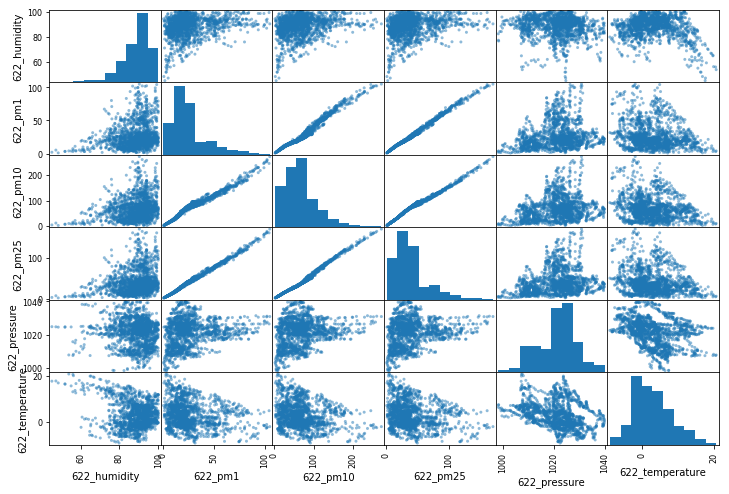

In [13]:
scatter_matrix(loc, figsize=(12,8))